In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
housing_data = pd.read_csv('housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13211,-117.70,34.04,13.0,5301.0,1025.0,2870.0,984.0,3.5954,163000.0,INLAND
2098,-119.77,36.76,43.0,1623.0,294.0,781.0,272.0,1.8690,56000.0,INLAND
1180,-121.54,39.47,14.0,1724.0,315.0,939.0,302.0,2.4952,53900.0,INLAND
16566,-121.45,37.72,2.0,2239.0,321.0,766.0,219.0,5.7500,240200.0,INLAND
2425,-119.55,36.61,14.0,3004.0,793.0,3535.0,735.0,1.5860,56900.0,INLAND


In [7]:
housing_data = housing_data.dropna()

In [8]:
housing_data.shape

(20433, 10)

In [9]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [10]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [11]:
housing_data.shape

(19475, 10)

In [12]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [16]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2044,-119.67,36.72,31.0,843.0,140.0,453.0,149.0,2.6875,153800.0,0,1,0,0,0
8964,-118.39,33.99,43.0,612.0,135.0,402.0,142.0,5.1322,314900.0,1,0,0,0,0
7708,-118.14,33.95,44.0,1812.0,338.0,822.0,314.0,6.7744,294100.0,1,0,0,0,0
17083,-122.20,37.47,37.0,1053.0,266.0,939.0,267.0,3.1989,320800.0,0,0,0,1,0
8095,-118.22,33.82,17.0,5357.0,1332.0,3030.0,1266.0,1.9311,138100.0,0,0,0,0,1


In [17]:
housing_data.shape

(19475, 14)

In [18]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [19]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [22]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [25]:
print("Training score : ", linear_model.score(x_train, y_train))

Training score :  0.6103645314181312


In [26]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -1.559476e+18
ocean_proximity_NEAR BAY     -1.559476e+18
ocean_proximity_<1H OCEAN    -1.559476e+18
ocean_proximity_NEAR OCEAN   -1.559476e+18
ocean_proximity_ISLAND       -1.559476e+18
longitude                    -2.508445e+04
latitude                     -2.316353e+04
population                   -2.900676e+01
total_rooms                  -7.574800e+00
households                    4.173637e+01
total_bedrooms                9.215812e+01
housing_median_age            9.256951e+02
median_income                 3.833527e+04
dtype: float64


In [28]:
y_pred = linear_model.predict(x_test)

In [29]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
1553,336896.0,345800.0
3167,72448.0,54600.0
10510,300288.0,272000.0
2599,99840.0,50000.0
819,215040.0,168100.0
7226,166656.0,156900.0
17572,227840.0,192600.0
9444,76544.0,92400.0
20522,124928.0,73100.0
7221,171776.0,138800.0


In [30]:
from sklearn.metrics import r2_score

print("Testing score : ", r2_score(y_test, y_pred))

Testing score :  0.6222676374684946


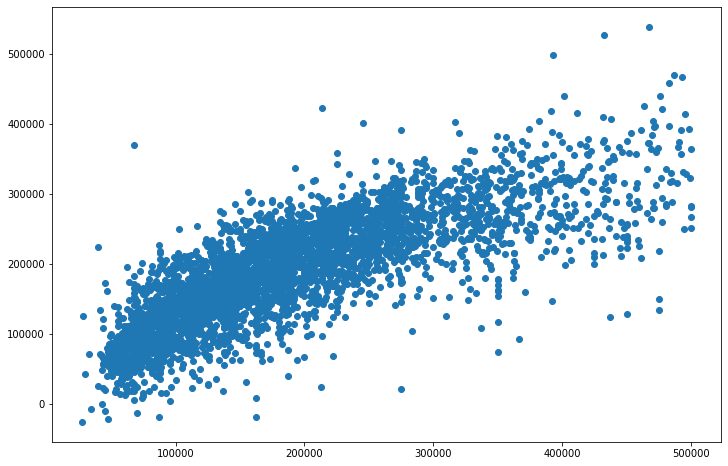

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [32]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [33]:
df_pred_actual_sample.head()

,index,predicted,actual
0,12834,119040.0,94900.0
1,5606,214016.0,154200.0
2,16872,322560.0,405100.0
3,15709,281088.0,460000.0
4,15507,203520.0,154200.0


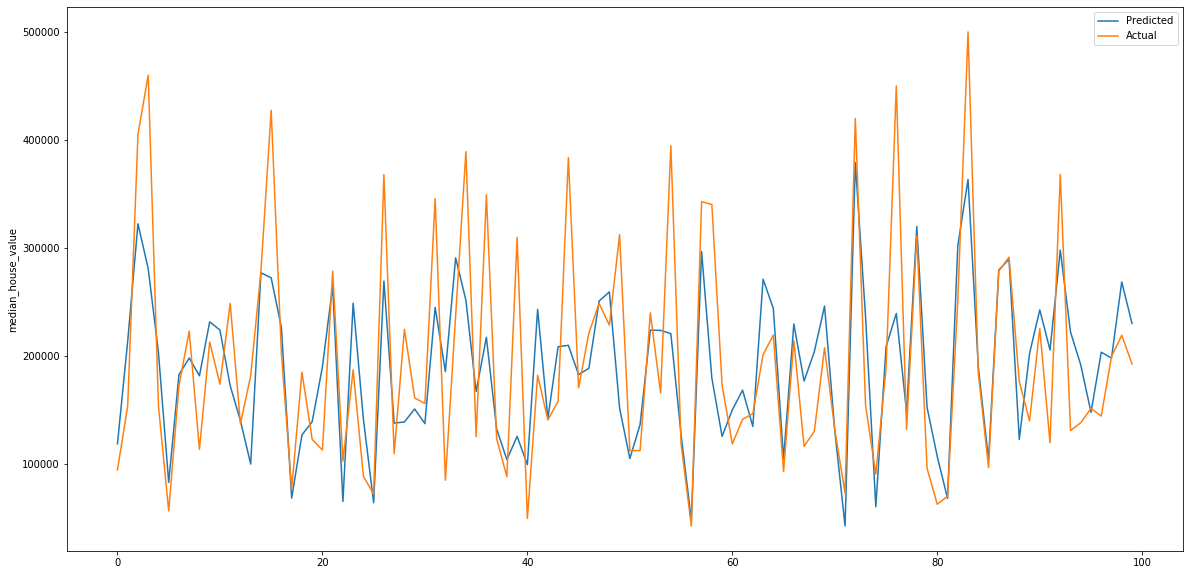

In [34]:
plt.figure(figsize=(20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()